In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import pandas as pd
import os
import pickle

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from src.models import parameter_learning as lfi
from src.models import build_model as build
from src.models import model_schemata as schema
from src.models import inference as inf
from src.visualization import visualize as viz

In [3]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

In [4]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp10_200i', 'exp11_200i']

In [5]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/predictions_marginf_relepev_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

#### Evaluation of learned parameters

Average JSD per experiment pair

In [7]:
predicates = ['p_occupancy']

jsd_dict = {}

# Iterate over predicates
for pred in predicates:
    jsd_dict[pred] = lfi.compare_jsds(pred, experiments, data)

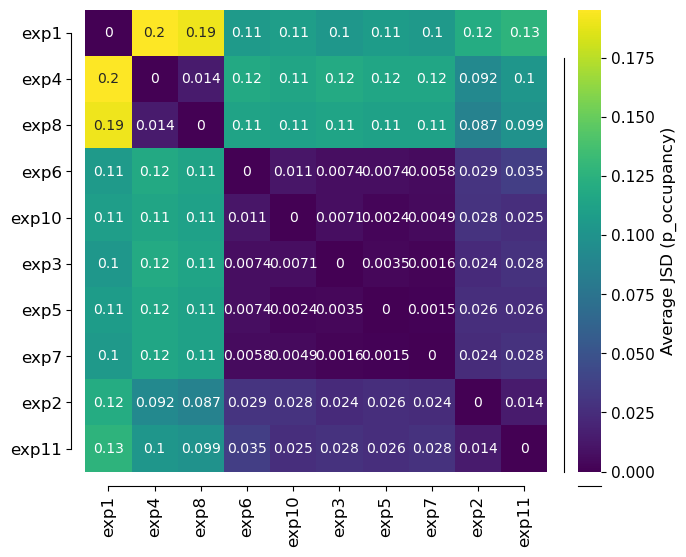

In [7]:
individual_predicate_jsd_heatmap = viz.calc_individual_predicate_jsd_heatmap(experiments, 'p_occupancy', jsd_dict)
sns.reset_orig()
viz.plot_clustered_heatmap(individual_predicate_jsd_heatmap, score_type='Average JSD (p_occupancy)')

Average fraction of MaxMatch per experiment pair

In [8]:
predicates = ['p_occupancy']

max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, data)

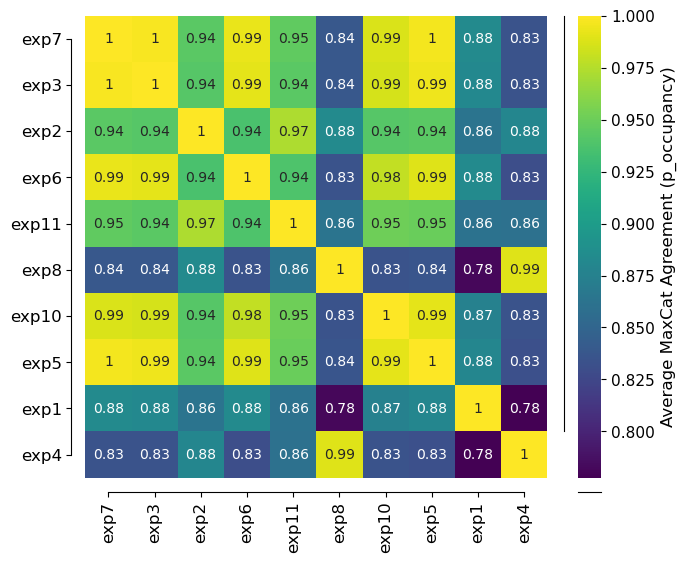

In [9]:
individual_predicate_overlap_heatmap = viz.calc_individual_predicate_overlap_heatmap(experiments, 'p_occupancy', max_dict)
sns.reset_orig()
viz.plot_clustered_heatmap(individual_predicate_overlap_heatmap, score_type='Average MaxCat Agreement (p_occupancy)')

#### Compare AUC (all experiments)

In [6]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp9_200i', 'exp10_200i', 'exp11_200i', 'exp12_40i']

In [7]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/predictions_marginf_relepev_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

In [8]:
p_fc = pd.read_csv('data/processed/ebdt_data/sub_network_p/p_fc.csv')
p_fc_scaled = pd.read_csv('data/processed/ebdt_data/sub_network_p/p_fc_scaled.csv')

In [9]:
p_fc['p_base'] = 1 - p_fc['p_dec'] - p_fc['p_inc']
p_fc.loc[p_fc['p_base'] < 0, 'p_base'] = 0

In [10]:
p_fc_scaled['p_base'] = 1 - p_fc_scaled['p_dec'] - p_fc_scaled['p_inc']
p_fc_scaled.loc[p_fc_scaled['p_base'] < 0, 'p_base'] = 0

In [11]:
analysis_dicts_0 = inf.prep_experiments_for_auc(data, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_scaled_0 = inf.prep_experiments_for_auc(data, p_fc_scaled, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_80 = inf.prep_experiments_for_auc(data, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)
analysis_dicts_scaled_80 = inf.prep_experiments_for_auc(data, p_fc_scaled, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [18]:
y_onehot_test_list_0 = []
y_score_list_0 = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    if exp in ['exp11_200i', 'exp12_40i']:
        print(exp)
        y_onehot_test_list_0.append(analysis_dicts_scaled_0[exp]['y_onehot_test'])
        y_score_list_0.append(analysis_dicts_scaled_0[exp]['y_score'])
        experiment_names.append(exp)
    else:
        y_onehot_test_list_0.append(analysis_dicts_0[exp]['y_onehot_test'])
        y_score_list_0.append(analysis_dicts_0[exp]['y_score'])
        experiment_names.append(exp)

exp11_200i
exp12_40i


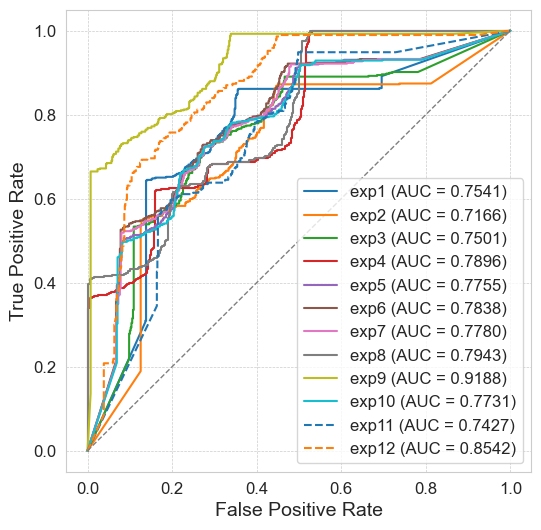

In [19]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0, y_score_list_0, experiment_names)

In [20]:
y_onehot_test_list_80 = []
y_score_list_80 = []
experiment_names = []
for exp in analysis_dicts_80.keys():
    if exp in ['exp11_200i', 'exp12_40i']:
        print(exp)
        y_onehot_test_list_80.append(analysis_dicts_scaled_80[exp]['y_onehot_test'])
        y_score_list_80.append(analysis_dicts_scaled_80[exp]['y_score'])
        experiment_names.append(exp)
    else:
        y_onehot_test_list_80.append(analysis_dicts_80[exp]['y_onehot_test'])
        y_score_list_80.append(analysis_dicts_80[exp]['y_score'])
        experiment_names.append(exp)

exp11_200i
exp12_40i


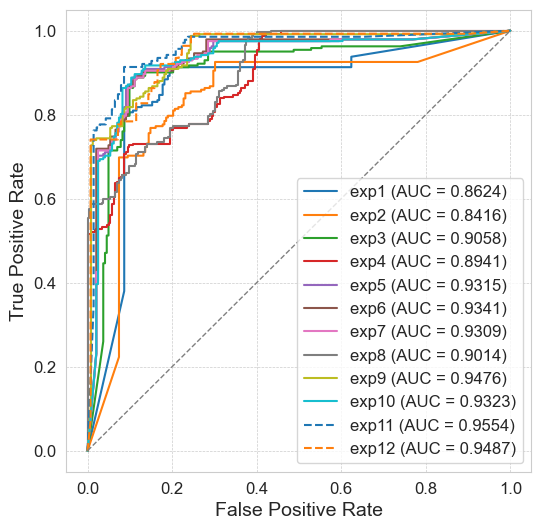

In [21]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80, y_score_list_80, experiment_names)

Compare fold change distribution (exp5 and exp11) (exp4 and 9?)

In [14]:
# Data extraction
fc_base = analysis_dicts_0['exp5_200i']['analysis_dataframe']['p_base_p_fc']
fc_inc = analysis_dicts_0['exp5_200i']['analysis_dataframe']['p_inc_p_fc']
fc_scaled_base = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['p_base_p_fc']
fc_scaled_inc = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['p_inc_p_fc']

exp4_base = analysis_dicts_0['exp4_200i']['analysis_dataframe']['p_base_p_occupancy']
exp4_inc = analysis_dicts_0['exp4_200i']['analysis_dataframe']['p_inc_p_occupancy']
exp5_base = analysis_dicts_0['exp5_200i']['analysis_dataframe']['p_base_p_occupancy']
exp5_inc = analysis_dicts_0['exp5_200i']['analysis_dataframe']['p_inc_p_occupancy']
exp9_base = analysis_dicts_0['exp9_200i']['analysis_dataframe']['p_base_p_occupancy']
exp9_inc = analysis_dicts_0['exp9_200i']['analysis_dataframe']['p_inc_p_occupancy']

exp11_base = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['p_base_p_occupancy']
exp11_inc = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['p_inc_p_occupancy']
exp12_base = analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['p_base_p_occupancy']
exp12_inc = analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['p_inc_p_occupancy']

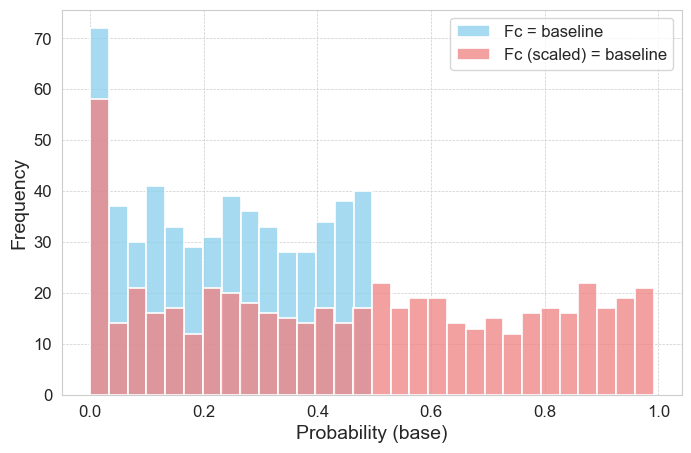

In [15]:
# Set a theme for seaborn for a nicer look
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5), dpi=100)

# Plot the KDE for data2
sns.histplot(fc_base, bins=15, kde=False, color='skyblue', linewidth=1.2, label='Fc = baseline')  # Change color and label as appropriate

# Plot the KDE for data1
sns.histplot(fc_scaled_base, bins=30, kde=False, color='lightcoral', linewidth=1.2, label='Fc (scaled) = baseline')

# Add titles, labels, and legend
plt.xlabel('Probability (base)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5)

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)

# Despine for aesthetics
# sns.despine(trim=True, left=True)

# Display the plot
# plt.tight_layout()
plt.show()

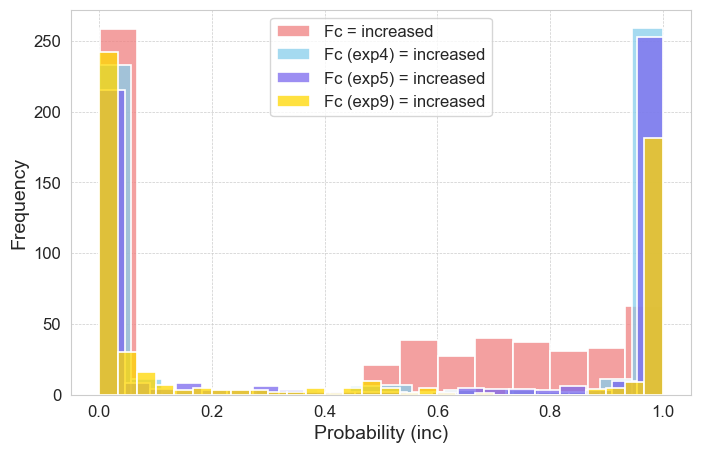

In [16]:
# Set a theme for seaborn for a nicer look
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5), dpi=100)

# Plot the KDE for data1
sns.histplot(fc_inc, bins=15, kde=False, color='lightcoral', linewidth=1.2, label='Fc = increased')  # Change color and label as appropriate
sns.histplot(exp4_inc, bins=18, kde=False, color='skyblue', linewidth=1.2, label='Fc (exp4) = increased')
sns.histplot(exp5_inc, bins=22, kde=False, color='mediumslateblue', linewidth=1.2, label='Fc (exp5) = increased')
sns.histplot(exp9_inc, bins=30, kde=False, color='gold', linewidth=1.2, label='Fc (exp9) = increased')

# Add titles, labels, and legend
plt.xlabel('Probability (inc)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5)

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)

# Despine for aesthetics
# sns.despine(trim=True, left=True)

# Display the plot
# plt.tight_layout()
plt.show()

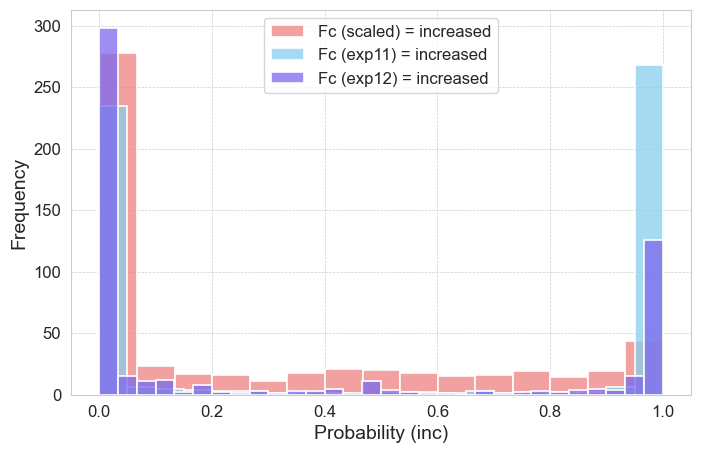

In [17]:
# Set a theme for seaborn for a nicer look
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5), dpi=100)

# Plot the KDE for data1
sns.histplot(fc_scaled_inc, bins=15, kde=False, color='lightcoral', linewidth=1.2, label='Fc (scaled) = increased')  # Change color and label as appropriate
sns.histplot(exp11_inc, bins=20, kde=False, color='skyblue', linewidth=1.2, label='Fc (exp11) = increased')
sns.histplot(exp12_inc, bins=30, kde=False, color='mediumslateblue', linewidth=1.2, label='Fc (exp12) = increased')

# Add titles, labels, and legend
plt.xlabel('Probability (inc)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5)

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)

# Despine for aesthetics
# sns.despine(trim=True, left=True)

# Display the plot
# plt.tight_layout()
plt.show()

Compare influence of instances (exp6)

In [25]:
experiments = ['exp6_5i', 'exp6_10i', 'exp6_40i', 'exp6_200i']

In [26]:
data2 = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/predictions_marginf_relepev_{exp}.pkl', 'rb') as f:
        data2[exp] = pickle.load(f)

In [27]:
analysis_dicts_exp6_0 = inf.prep_experiments_for_auc(data2, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_exp6_80 = inf.prep_experiments_for_auc(data2, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [28]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_exp6_0.keys():
    y_onehot_test_list.append(analysis_dicts_exp6_0[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_exp6_0[exp]['y_score'])
    experiment_names.append(exp)

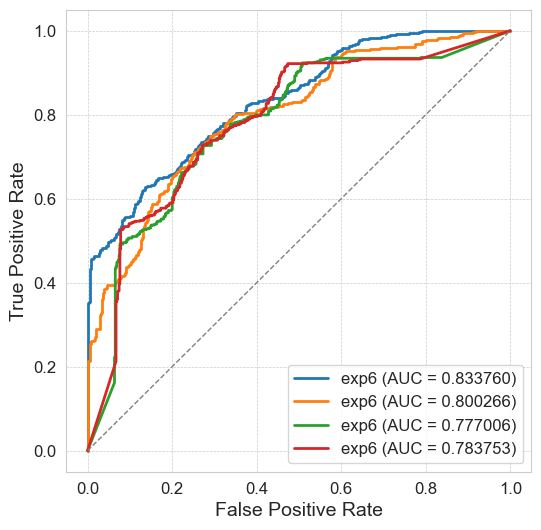

In [31]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list, y_score_list, experiment_names)

In [32]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_exp6_80.keys():
    y_onehot_test_list.append(analysis_dicts_exp6_80[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_exp6_80[exp]['y_score'])
    experiment_names.append(exp)

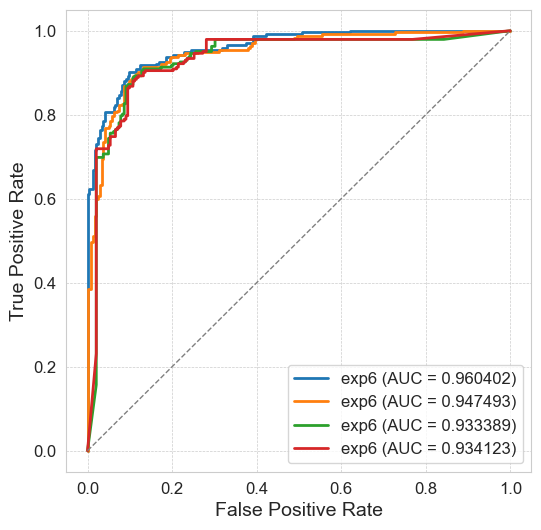

In [33]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list, y_score_list, experiment_names)

Plot exp 5 and 11 density (fc) and 4 (uncertain evidence)
Potentially label by number of parents? Pick out mismatch lower/higher end and visualise with bayesialab

In [12]:
# Extracting data from your analysis dictionary
x5 = analysis_dicts_0['exp5_200i']['analysis_dataframe']['prob']
y5 = analysis_dicts_0['exp5_200i']['analysis_dataframe']['JSD']
mask_no_match5 = analysis_dicts_0['exp5_200i']['analysis_dataframe']['MaxMatch'] == 0

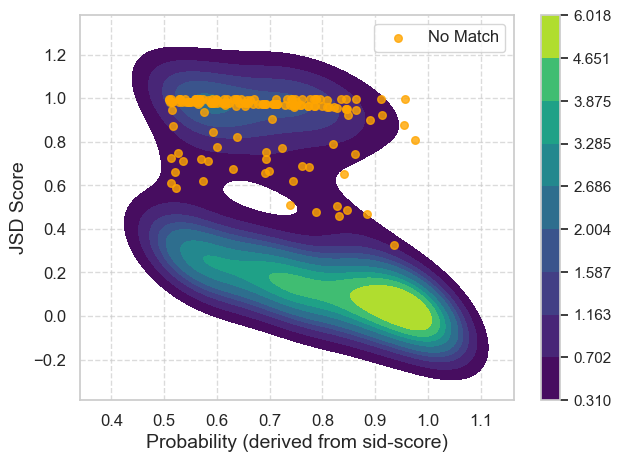

In [13]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x5, y=y5, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x5[mask_no_match5], y5[mask_no_match5], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [14]:
# Extracting data from your analysis dictionary
x11 = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['prob']
y11 = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['JSD']
mask_no_match11 = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['MaxMatch'] == 0

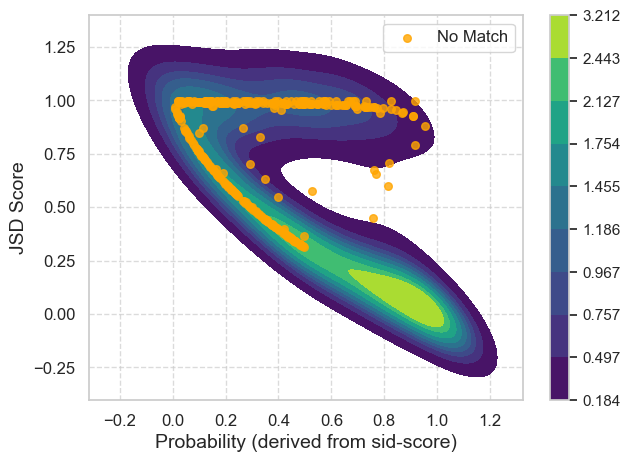

In [15]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x11, y=y11, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x11[mask_no_match11], y11[mask_no_match11], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [33]:
mismatch_df = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe'][mask_no_match11]
table1 = mismatch_df[mismatch_df['sample'] == 'Dabrafenib'].sort_values(by=['prob'], ascending=[False])
table1


,phosphosite,sample,value,prob,p_dec_p_fc,p_inc_p_fc,p_base_p_fc,p_dec_p_occupancy,p_inc_p_occupancy,p_base_p_occupancy,JSD,max_category_p_fc,max_category_p_occupancy,MaxMatch
191,BCLAF1(Y284),Dabrafenib,dec,0.916551,0.916551,0.001000,0.082449,0.081515,0.918485,0.000000e+00,0.790728,p_dec,p_inc,0
146,ABI1(Y213),Dabrafenib,dec,0.729065,0.729065,0.001000,0.269935,0.005591,0.994409,0.000000e+00,0.970607,p_dec,p_inc,0
296,PXN(Y118),Dabrafenib,inc,0.436841,0.001000,0.436841,0.562159,0.002847,0.997140,1.371930e-05,0.362409,p_base,p_inc,0
155,HIPK2(Y361),Dabrafenib,dec,0.384687,0.384687,0.001000,0.614313,0.009445,0.990555,3.800000e-09,0.962151,p_base,p_inc,0
245,ATF1(S198),Dabrafenib,inc,0.240046,0.001000,0.240046,0.758954,0.000000,1.000000,0.000000e+00,0.560467,p_base,p_inc,0
79,RBM39(Y95),Dabrafenib,dec,0.201637,0.201637,0.001000,0.797363,0.001301,0.998699,2.600000e-09,0.988621,p_base,p_inc,0
107,PXN(Y88),Dabrafenib,dec,0.072896,0.072896,0.001000,0.926104,0.003354,0.996646,0.000000e+00,0.984375,p_base,p_inc,0


In [34]:
table1 = table1[['phosphosite', 'sample', 'max_category_p_fc', 'prob', 'max_category_p_occupancy', 'p_inc_p_occupancy', 'JSD']]
table1

,phosphosite,sample,max_category_p_fc,prob,max_category_p_occupancy,p_inc_p_occupancy,JSD
191,BCLAF1(Y284),Dabrafenib,p_dec,0.916551,p_inc,0.918485,0.790728
146,ABI1(Y213),Dabrafenib,p_dec,0.729065,p_inc,0.994409,0.970607
296,PXN(Y118),Dabrafenib,p_base,0.436841,p_inc,0.997140,0.362409
155,HIPK2(Y361),Dabrafenib,p_base,0.384687,p_inc,0.990555,0.962151
245,ATF1(S198),Dabrafenib,p_base,0.240046,p_inc,1.000000,0.560467
79,RBM39(Y95),Dabrafenib,p_base,0.201637,p_inc,0.998699,0.988621
107,PXN(Y88),Dabrafenib,p_base,0.072896,p_inc,0.996646,0.984375


In [43]:
# Extracting data from your analysis dictionary
x4 = analysis_dicts_0['exp4_200i']['analysis_dataframe']['prob']
y4 = analysis_dicts_0['exp4_200i']['analysis_dataframe']['JSD']
mask_no_match4 = analysis_dicts_0['exp4_200i']['analysis_dataframe']['MaxMatch'] == 0

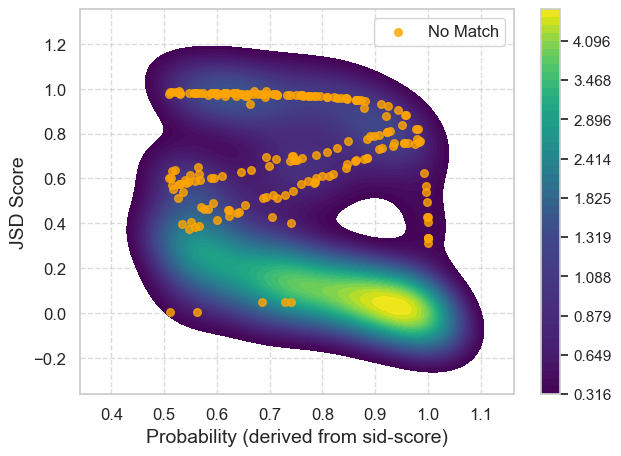

In [44]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x4, y=y4, cmap='viridis', fill=True, levels=50, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x4[mask_no_match4], y4[mask_no_match4], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [45]:
# Extracting data from your analysis dictionary
x9 = analysis_dicts_0['exp9_200i']['analysis_dataframe']['prob']
y9 = analysis_dicts_0['exp9_200i']['analysis_dataframe']['JSD']
mask_no_match9 = analysis_dicts_0['exp9_200i']['analysis_dataframe']['MaxMatch'] == 0

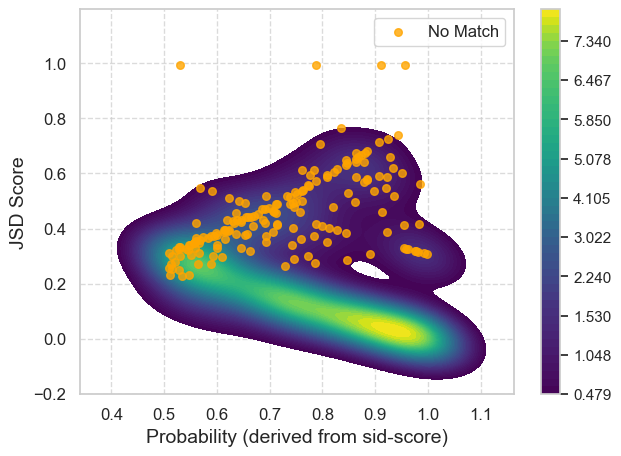

In [46]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x9, y=y9, cmap='viridis', fill=True, levels=50, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x9[mask_no_match9], y9[mask_no_match9], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [19]:
# Extracting data from your analysis dictionary
x12 = analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['prob']
y12 = analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['JSD']
mask_no_match12 = analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['MaxMatch'] == 0

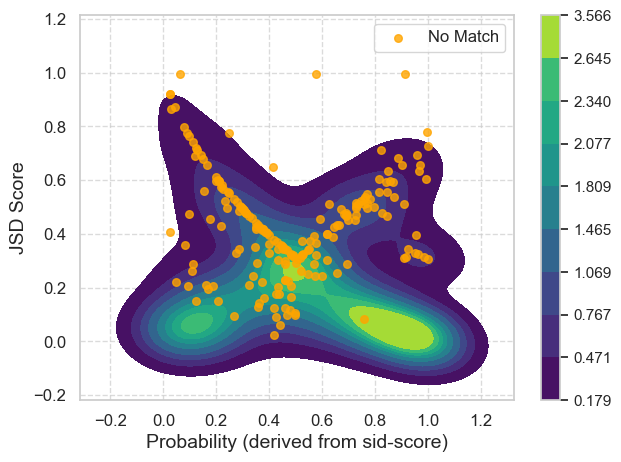

In [21]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x12, y=y12, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x12[mask_no_match12], y12[mask_no_match12], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

Plot which category misclassified as which (cm?)
Compare maxmatch between scaled/fc

In [49]:
# Merge dataframes
merged_df = analysis_dicts_0['exp5_200i']['analysis_dataframe'].merge(analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe'], on=['phosphosite', 'sample'], suffixes=('_fc', '_fcsc'))

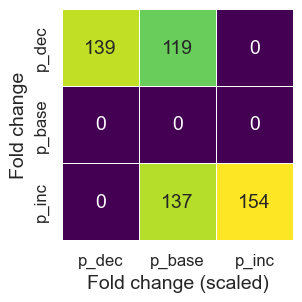

In [50]:
# Get confusion matrix
conf_matrix = confusion_matrix(merged_df['max_category_p_fc_fc'], merged_df['max_category_p_fc_fcsc'], labels=['p_dec', 'p_base', 'p_inc'])

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(3, 3), dpi=100)

# Use Seaborn's heatmap function to plot the confusion matrix
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5, 
                 cbar=False, square=True, annot_kws={"size": 14})

# Add x and y axis labels and adjust font size
ax.set_xlabel('Fold change (scaled)', fontsize=14)
ax.set_ylabel('Fold change', fontsize=14)

# Set tick labels and increase their size
ax.set_xticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)
ax.set_yticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)

# Remove grid lines (Seaborn's heatmap has lines by default)
ax.grid(False)

# plt.tight_layout()
plt.show()


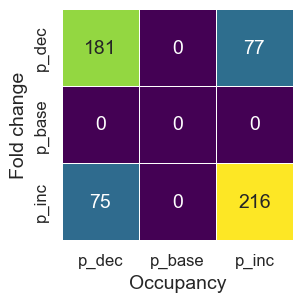

In [51]:
# Get confusion matrix
conf_matrix = confusion_matrix(analysis_dicts_0['exp5_200i']['analysis_dataframe']['max_category_p_fc'], analysis_dicts_0['exp5_200i']['analysis_dataframe']['max_category_p_occupancy'], labels=['p_dec', 'p_base', 'p_inc'])

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(3, 3), dpi=100)

# Use Seaborn's heatmap function to plot the confusion matrix
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5, 
                 cbar=False, square=True, annot_kws={"size": 14})

# Add x and y axis labels and adjust font size
ax.set_xlabel('Occupancy', fontsize=14)
ax.set_ylabel('Fold change', fontsize=14)

# Set tick labels and increase their size
ax.set_xticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)
ax.set_yticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)

# Remove grid lines (Seaborn's heatmap has lines by default)
ax.grid(False)

# plt.tight_layout()
plt.show()


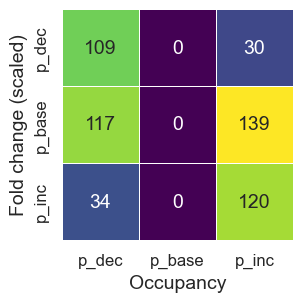

In [52]:
# Get confusion matrix
conf_matrix = confusion_matrix(analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['max_category_p_fc'], analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['max_category_p_occupancy'], labels=['p_dec', 'p_base', 'p_inc'])

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(3, 3), dpi=100)

# Use Seaborn's heatmap function to plot the confusion matrix
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5, 
                 cbar=False, square=True, annot_kws={"size": 14})

# Add x and y axis labels and adjust font size
ax.set_xlabel('Occupancy', fontsize=14)
ax.set_ylabel('Fold change (scaled)', fontsize=14)

# Set tick labels and increase their size
ax.set_xticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)
ax.set_yticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)

# Remove grid lines (Seaborn's heatmap has lines by default)
ax.grid(False)

# plt.tight_layout()
plt.show()

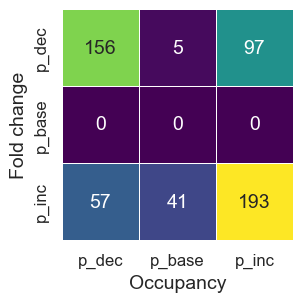

In [53]:
# Get confusion matrix
conf_matrix = confusion_matrix(analysis_dicts_0['exp4_200i']['analysis_dataframe']['max_category_p_fc'], analysis_dicts_0['exp4_200i']['analysis_dataframe']['max_category_p_occupancy'], labels=['p_dec', 'p_base', 'p_inc'])

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(3, 3), dpi=100)

# Use Seaborn's heatmap function to plot the confusion matrix
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5, 
                 cbar=False, square=True, annot_kws={"size": 14})

# Add x and y axis labels and adjust font size
ax.set_xlabel('Occupancy', fontsize=14)
ax.set_ylabel('Fold change', fontsize=14)

# Set tick labels and increase their size
ax.set_xticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)
ax.set_yticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)

# Remove grid lines (Seaborn's heatmap has lines by default)
ax.grid(False)

# plt.tight_layout()
plt.show()

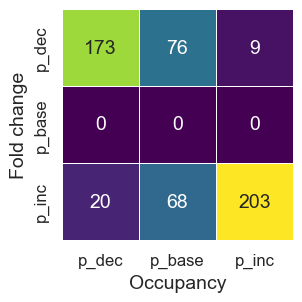

In [54]:
# Get confusion matrix
conf_matrix = confusion_matrix(analysis_dicts_0['exp9_200i']['analysis_dataframe']['max_category_p_fc'], analysis_dicts_0['exp9_200i']['analysis_dataframe']['max_category_p_occupancy'], labels=['p_dec', 'p_base', 'p_inc'])

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(3, 3), dpi=100)

# Use Seaborn's heatmap function to plot the confusion matrix
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5, 
                 cbar=False, square=True, annot_kws={"size": 14})

# Add x and y axis labels and adjust font size
ax.set_xlabel('Occupancy', fontsize=14)
ax.set_ylabel('Fold change', fontsize=14)

# Set tick labels and increase their size
ax.set_xticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)
ax.set_yticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)

# Remove grid lines (Seaborn's heatmap has lines by default)
ax.grid(False)

# plt.tight_layout()
plt.show()

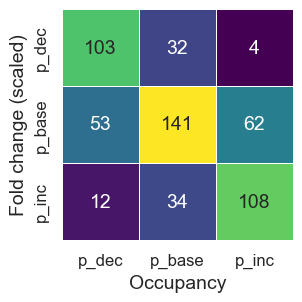

In [55]:
# Get confusion matrix
conf_matrix = confusion_matrix(analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['max_category_p_fc'], analysis_dicts_scaled_0['exp12_40i']['analysis_dataframe']['max_category_p_occupancy'], labels=['p_dec', 'p_base', 'p_inc'])

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(3, 3), dpi=100)

# Use Seaborn's heatmap function to plot the confusion matrix
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5, 
                 cbar=False, square=True, annot_kws={"size": 14})

# Add x and y axis labels and adjust font size
ax.set_xlabel('Occupancy', fontsize=14)
ax.set_ylabel('Fold change (scaled)', fontsize=14)

# Set tick labels and increase their size
ax.set_xticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)
ax.set_yticklabels(['p_dec', 'p_base', 'p_inc'], fontsize=12)

# Remove grid lines (Seaborn's heatmap has lines by default)
ax.grid(False)

# plt.tight_layout()
plt.show()